In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/campaign_responses.csv')


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB


In [ ]:
df.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [ ]:
df.describe()

,customer_id,age,annual_income,credit_score,no_of_children
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,36.214286,69017.857143,719.107143,1.285714
std,16.309506,7.088311,22784.756524,60.340753,1.186504
min,1.000000,25.000000,35000.000000,600.000000,0.000000
25%,14.750000,30.000000,48000.000000,677.500000,0.000000
50%,28.500000,35.500000,64500.000000,720.000000,1.000000
75%,42.250000,42.000000,90000.000000,770.000000,2.000000
max,56.000000,51.000000,110000.000000,820.000000,3.000000


In [ ]:
df.isnull().sum()

customer_id       0
age               0
gender            0
annual_income     0
credit_score      0
employed          0
marital_status    0
no_of_children    0
responded         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

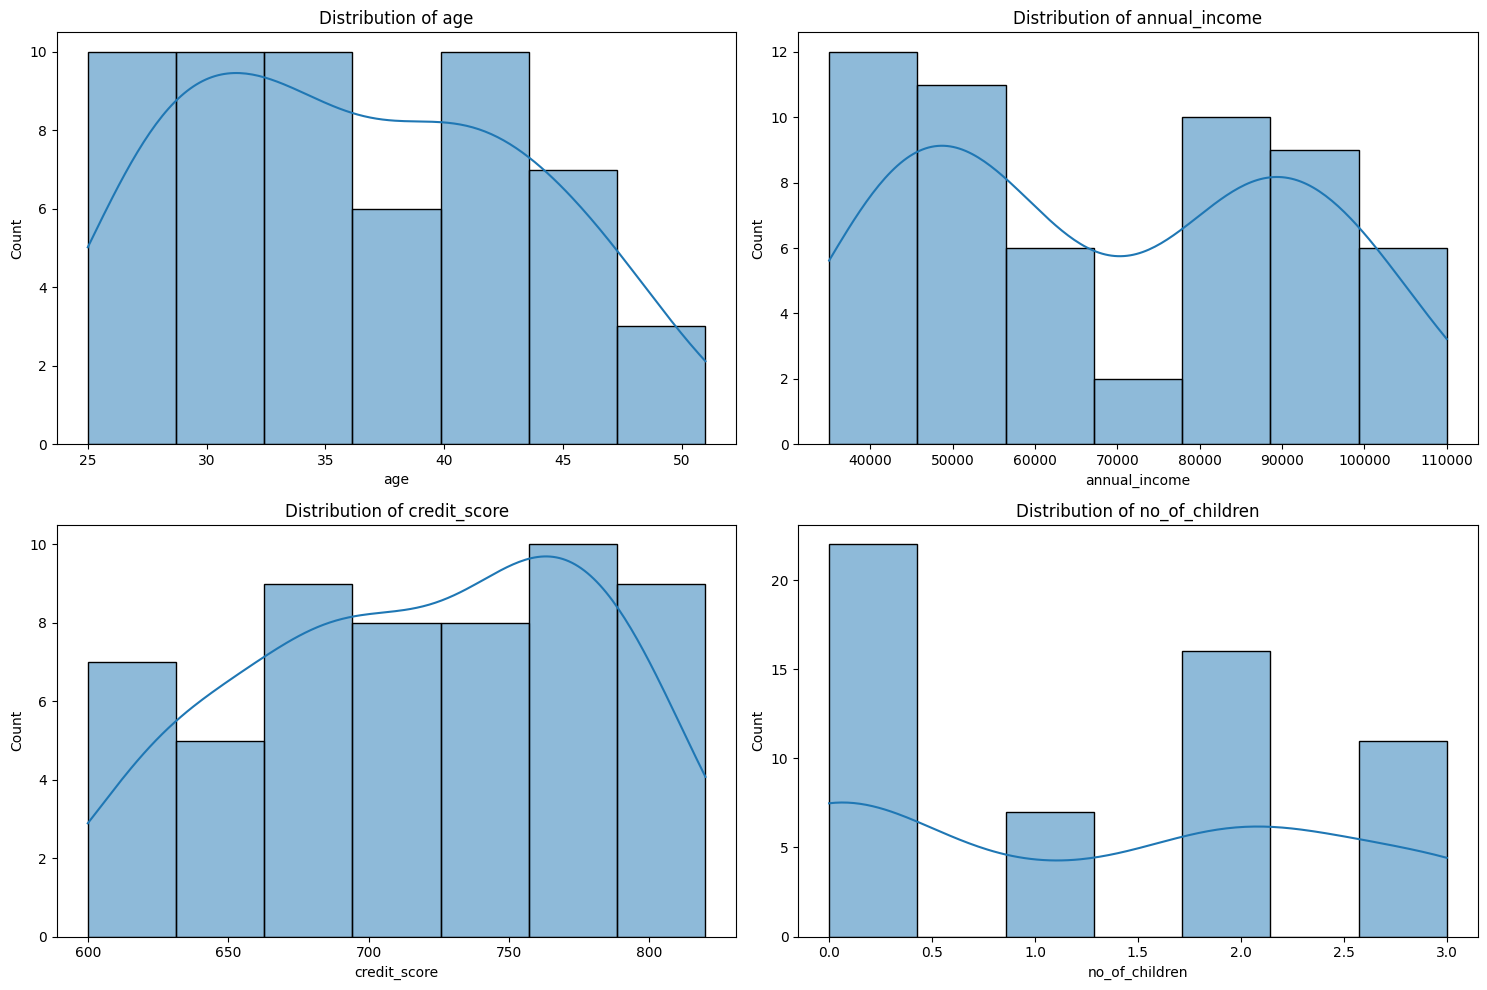

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features
numerical_cols = ['age', 'annual_income', 'credit_score', 'no_of_children']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

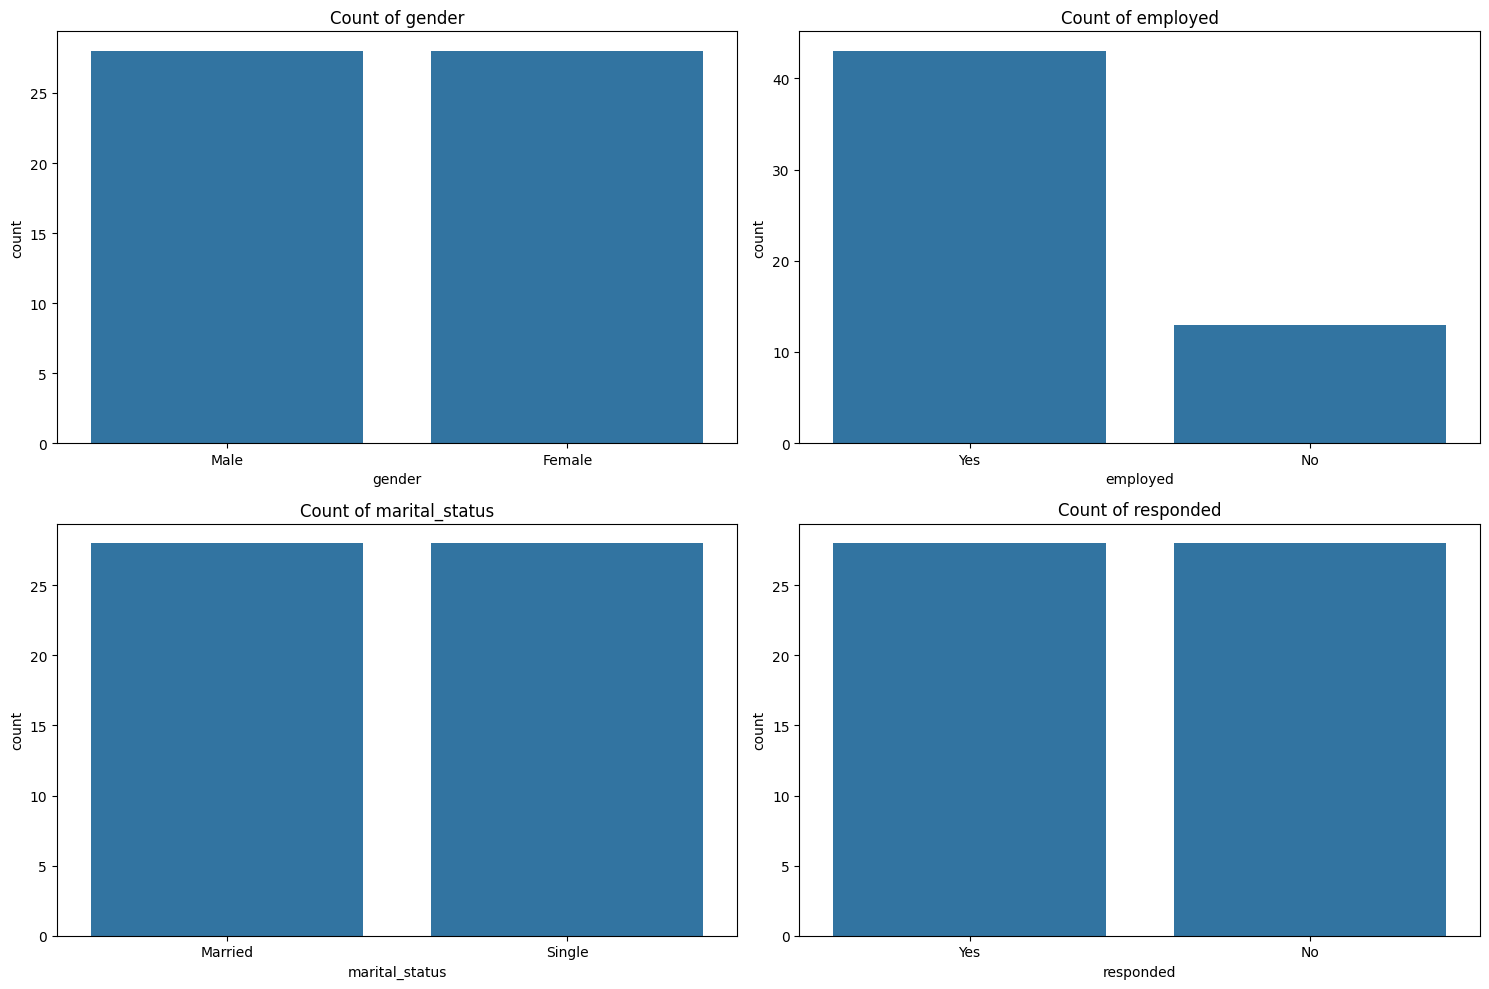

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot count plots for categorical features
categorical_cols = ['gender', 'employed', 'marital_status', 'responded']

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

categorical_cols = ['gender', 'employed', 'marital_status', 'responded']

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target variable
X = df.drop(['customer_id', 'responded'], axis=1)
y = df['responded']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy

0.9411764705882353

In [ ]:
print(classification_rep)


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.91      0.95        11

    accuracy                           0.94        17
   macro avg       0.93      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



One hot encoding

In [ ]:
df = pd.read_csv('/content/campaign_responses.csv')

# One-Hot Encoding using pandas get_dummies for simplicity
df_encoded = pd.get_dummies(df.drop(['customer_id', 'responded'], axis=1), dtype='int')

# Features and target variable
X_encoded = df_encoded
y_encoded = df['responded']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Train the Decision Tree model on the one-hot encoded data
dt_model_encoded = DecisionTreeClassifier(random_state=42)
dt_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_encoded = dt_model_encoded.predict(X_test_encoded)

# Evaluate the model
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
classification_rep_encoded = classification_report(y_test_encoded, y_pred_encoded)

accuracy_encoded


1.0

In [ ]:
print(classification_rep_encoded)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         6
         Yes       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

